In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

crashes = pd.read_csv("C:/Users/Rachel Law/Documents/input/planecrashinfo.csv")
#inspect data
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null object
time            5783 non-null object
location        5783 non-null object
operator        5783 non-null object
flight_no       5783 non-null object
route           5783 non-null object
ac_type         5783 non-null object
registration    5783 non-null object
cn_ln           5783 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5783 non-null object
summary         5783 non-null object
dtypes: object(13)
memory usage: 587.5+ KB


* There are 5783 rows and 13 columns

In [2]:
crashes.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [3]:
#separate year from date
crashes['date'] = pd.to_datetime(crashes['date'])
crashes['date'].head()
crashes['year'] = crashes['date'].dt.year
crashes['year'].head()

0    1908
1    1909
2    1912
3    1913
4    1913
Name: year, dtype: int64

In [4]:
#to get total fatalities number
crashes['fatalities_num'] = crashes['fatalities'].str.split().apply(lambda x: x[0])
crashes['fatalities_num'] = pd.to_numeric(crashes['fatalities_num'], errors='coerce')
crashes['fatalities_num'].head()
crashes['fatalities_num'].sum()

115122.0

**1. Airline operator with the most crashes and fatalities** 

In [5]:
#to clean operator data
crashes.operator = crashes.operator.str.upper()
crashes.operator = crashes.operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

#to find the operator with the highest number of crashes
crashes['operator'].value_counts()


AEROFLOT                                          260
MILITARY - U.S. AIR FORCE                         177
AIR FRANCE                                         72
DEUTSCHE LUFTHANSA                                 64
UNITED AIR LINES                                   44
                                                 ... 
PAPILLON GRAND CANYON HELICOPTERS OF LAS VEGAS      1
CHALK'S INTERNATIONAL AIRLINES                      1
VOTEC / VOTEC                                       1
PARADISE TOUR HELICOPTERS                           1
AIR TAXI - HUDSON AIR SERVICE                       1
Name: operator, Length: 2809, dtype: int64

* Aeroflot has the highest number of crashes. 

In [6]:
#to find the operator with most fatalities
fatal_by_op = crashes.groupby('operator')[['fatalities_num']].sum()
fatal_by_op = fatal_by_op.rename(columns={"operator": "fatalities_num"})
fatal_by_op = fatal_by_op.sort_values(by='fatalities_num', ascending=False)
#inspect data
fatal_by_op.head(20)

,fatalities_num
operator,
AEROFLOT,9048.0
MILITARY - U.S. AIR FORCE,3718.0
AIR FRANCE,1748.0
AMERICAN AIRLINES,1422.0
PAN AMERICAN WORLD AIRWAYS,1303.0
MILITARY - U.S. ARMY AIR FORCES,1070.0
UNITED AIR LINES,1019.0
AVIANCA,945.0
TURKISH AIRLINES (THY),891.0


*  Aeroflot has the highest number of fatalities.

**2. Trend of Number of Airplane Crashes and Fatalities**

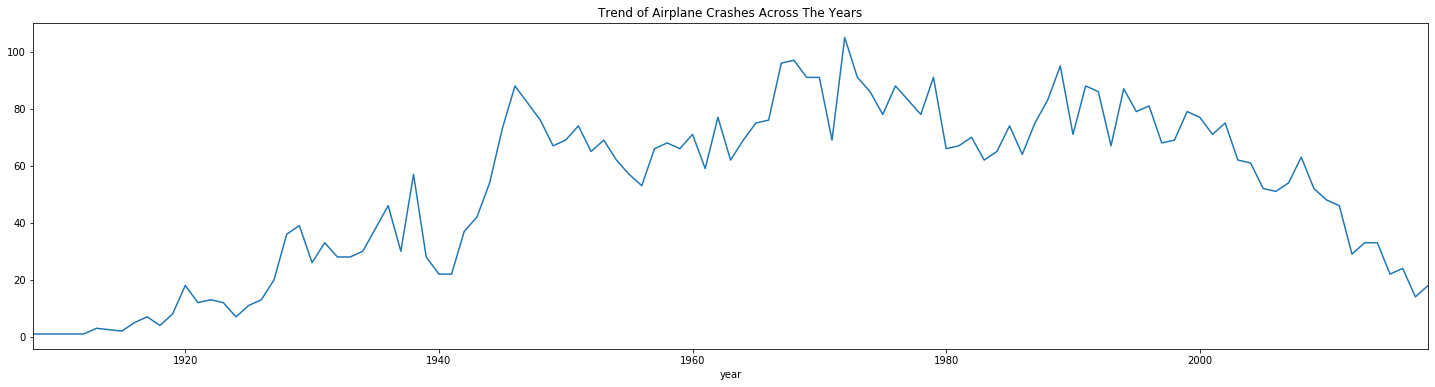

In [7]:
crash_trend = crashes.groupby('year').size().plot(figsize=(25, 6))
crash_trend.set_title("Trend of Airplane Crashes Across The Years")
plt.show()

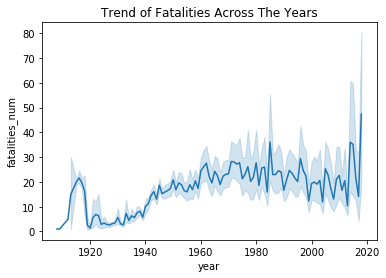

In [8]:
fatal_trend = sns.lineplot(x=crashes['year'], y=crashes['fatalities_num'])
fatal_trend.set_title("Trend of Fatalities Across The Years")
plt.show()

* The number of airplane crashes is downward trending while the number of fatalities is upward trending across the years. This might indicate that the number of fatalities per airplane crashes increases. However, the number of people flying might increase over the years as well. Hence, we should look at the trend of the ratio of the number of fatalities to the number of people aboard to gain a more accurate insight on the fatalities trend.

**3. Countries that crashes are happening and the top 5 countries with the highest fatalities in airplane crashes**

In [15]:
#to clean location data by using geocoder
!pip install geocoder
from tqdm import tqdm
import geocoder

tqdm.pandas()

def convertCN(x):
    x1=x.lstrip('Near').lstrip('Over').lstrip('Off')
    x2=x.split(',')[-1]
    try:
        CN=geocoder.yahoo(x1).country
        if len(CN)>1:
            return CN
        else:
            return x2
    except:
        return x2
    
crashes['country']=crashes['location'].progress_apply(lambda x: convertCN(x))

C:\Users\Rachel Law\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████████████████| 5783/5783 [18:15<00:00,  5.28it/s]


In [19]:
crashes.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,year,fatalities_num,country,fatalities_pas,aboard_pas
0,1908-09-17,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,Virginia,1.0,1.0
1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,1909,1.0,France,0.0,0.0
2,1912-07-12,06:30,"Atlantic City, New Jersey",MILITARY - U.S. NAVY,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,1912,5.0,New Jersey,0.0,0.0
3,1913-08-06,?,"Victoria, British Columbia, Canada",PRIVATE,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,1913,1.0,Canada,0.0,0.0
4,1913-09-09,c 18:30,Over the North Sea,MILITARY - GERMAN NAVY,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,1913,14.0,Over the North Sea,NaN,NaN


In [20]:
crashes['country'].value_counts()

 Russia                    259
 Brazil                    198
 Alaska                    195
 Colombia                  160
 Canada                    157
                          ... 
 Belize                      1
 British Virgin Islands      1
Angola                       1
Off Algiers                  1
Venezuela                    1
Name: country, Length: 613, dtype: int64

In [21]:
#to find the top 5 countries with highest fatalities
fatal_by_country = crashes.groupby('country')[['fatalities_num']].sum()
fatal_by_country = fatal_by_country.rename(columns={"country": "fatalities_num"})
fatal_by_country = fatal_by_country.sort_values(by='fatalities_num', ascending=False)
#inspect data
fatal_by_country.head(5)

,fatalities_num
country,
Russia,8480.0
Brazil,3334.0
USSR,3193.0
Colombia,3072.0
France,2885.0


* Crashes were mostly happening in countries like Russia, Brazil, Colombia and Canada.
* Top 5 countries with the highest fatalities in airplane crashes are: Russia, Brazil, USSR, Colombia and France.  

**4. Is the fatality rate of crew higher than passenger?**

In [9]:
#to get fatalities number of passengers
crashes['fatalities_pas'] = crashes['fatalities'].str.split(':').apply(lambda x: x[1].split()[0])
crashes['fatalities_pas'] = pd.to_numeric(crashes['fatalities_pas'], errors='coerce')
fatal_num_pas = crashes['fatalities_pas'].sum()
print("Fatalities Number of Passengers :" , fatal_num_pas)

#to get the total number of passengers aboard
crashes['aboard_pas'] = crashes['aboard'].str.split(':').apply(lambda x: x[1].split()[0])
crashes['aboard_pas'] = pd.to_numeric(crashes['aboard_pas'], errors='coerce')
aboard_num_pas = crashes['aboard_pas'].sum()
print("Number of Passengers Aboard:", aboard_num_pas)

#to get the fatality rate of passengers
fatal_r_pas = (fatal_num_pas/aboard_num_pas)*100
print("Fatality Rate of Passengers (%):", fatal_r_pas)  

Fatalities Number of Passengers : 88528.0
Number of Passengers Aboard: 125597.0
Fatality Rate of Passengers (%): 70.48576001019133


In [10]:
#to get fatalities number of crews
crashes['fatalities_crew'] = crashes['fatalities'].str.split(':').apply(lambda x: x[2].strip(')'))
crashes['fatalities_crew'] = pd.to_numeric(crashes['fatalities_crew'], errors='coerce')
fatal_num_crew = crashes['fatalities_crew'].sum()
print("Fatalities Number of Crews :", fatal_num_crew)

#to get the total number of crews aboard
crashes['aboard_crew'] = crashes['aboard'].str.split(':').apply(lambda x: x[2].strip(')'))
crashes['aboard_crew'] = pd.to_numeric(crashes['aboard_crew'], errors='coerce')
aboard_num_crew = crashes['aboard_crew'].sum()
print("Number of Crews Aboard:", aboard_num_crew)      

#to get the fatality rate of crews
fatal_r_crew = (fatal_num_crew/aboard_num_crew)*100
print("Fatality Rate of Crews (%):", fatal_r_crew)

Fatalities Number of Crews : 17521.0
Number of Crews Aboard: 21717.0
Fatality Rate of Crews (%): 80.67873094810517


* The fatality rate of crew (80.7%) is higher than that of passengers (70.5%).

**5. Survival Rate of Airplane Crashes Across the Decades**

In [11]:
#to find survival rates across decades
crashes['aboard_num'] = crashes['aboard'].str.split("(", n = 1, expand=True)[0].str.strip()
crashes['aboard_num'] = pd.to_numeric(crashes['aboard_num'], errors="coerce")
crashes['aboard_num'].head()

crashes['survival_rate'] =  (crashes['aboard_num']-crashes['fatalities_num'])/crashes['aboard_num']*100
crashes['survival_rate'].head()

0    50.0
1     0.0
2     0.0
3     0.0
4    30.0
Name: survival_rate, dtype: float64

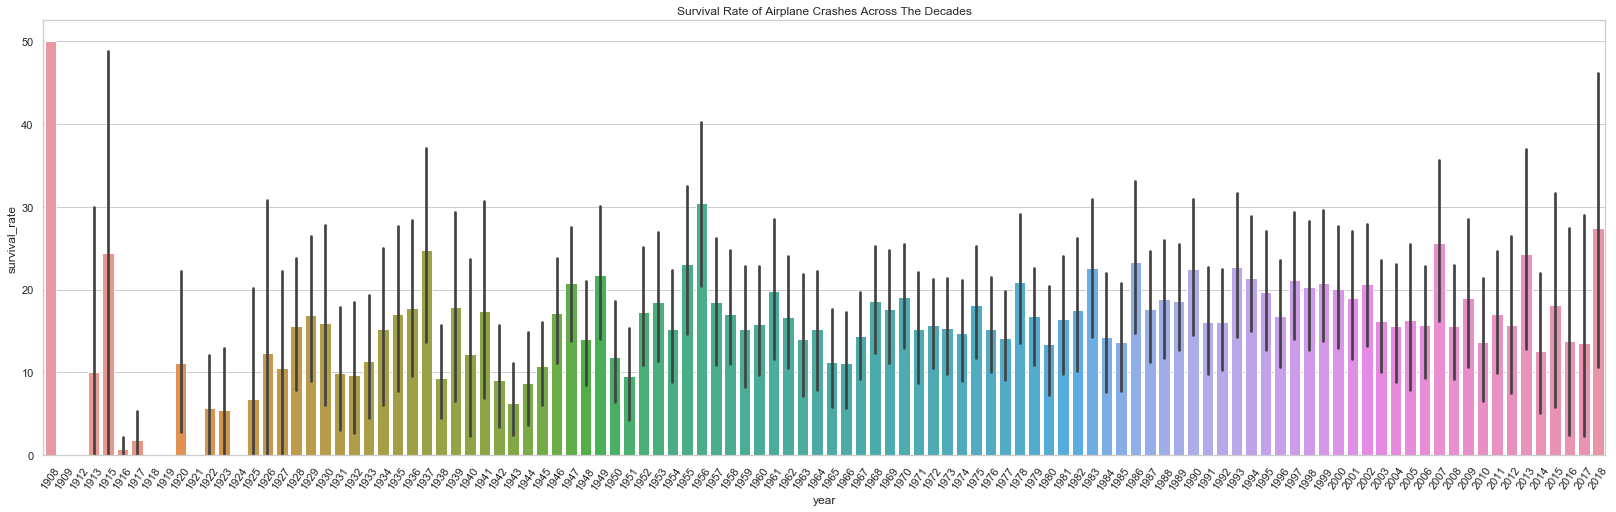

In [12]:
#plot the trend of survival rates across decades
x=crashes['year']
y=crashes['survival_rate']
sns.set(style="whitegrid")

plt.figure(figsize=(28,8))
surv_trend = sns.barplot(x=crashes['year'], y=crashes['survival_rate'])
surv_trend.set_title("Survival Rate of Airplane Crashes Across The Decades")
plt.xticks(rotation=55)
plt.show()

* The bar graph shows that the survival rate of airplane crashes has not improved by much across the decades as the distribution remains about the same.

**6. Factors Affecting Survival Rate**

In [13]:
#As survival rate is a continuous variable, correlation matrix can be deployed to inspect the relationship across the continuous features
corr = crashes.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,fatalities_num,fatalities_pas,aboard_pas,fatalities_crew,aboard_crew,aboard_num,survival_rate
year,1,0.108881,0.108016,0.148069,-0.00179885,0.0319392,0.150538,0.0577741
fatalities_num,0.108881,1,0.996924,0.753922,0.578282,0.500266,0.7536,-0.188928
fatalities_pas,0.108016,0.996924,1,0.764486,0.51462,0.451519,0.763831,-0.166115
aboard_pas,0.148069,0.753922,0.764486,1,0.301776,0.565848,0.997868,0.223861
fatalities_crew,-0.00179885,0.578282,0.51462,0.301776,1,0.789694,0.3474,-0.338419
aboard_crew,0.0319392,0.500266,0.451519,0.565848,0.789694,1,0.616425,0.108674
aboard_num,0.150538,0.7536,0.763831,0.997868,0.3474,0.616425,1,0.227952
survival_rate,0.0577741,-0.188928,-0.166115,0.223861,-0.338419,0.108674,0.227952,1


* We can see from the correlation matrix that survival rate is positively correlated with year of airplane crashes and number of people aboard. However, there are other features that are categorical and might have an effect on survival rate. Hence, we can deploy chi square test of independence to test the relationship between the categorical features and the survival rate.

In [14]:
#chi squared test of independence is for comparison of 2 categorical variables
#firstly convert survival rate to categorical data by assuming 50:50 chances of surviving 

crashes['dead_or_alive'] = ['alive' if each>=50 else 'dead' for each in crashes.survival_rate]
crashes['dead_or_alive'].head() 

0    alive
1     dead
2     dead
3     dead
4     dead
Name: dead_or_alive, dtype: object

In [15]:
#to test the effect of airplane operator on survival rate
#plot contingency table

contingency_table = pd.crosstab(crashes['dead_or_alive'], crashes['operator'], margins = True)
contingency_table

operator,46826/109,?,A&C BIG SKY AVIATION,AAXICO AIRLINES,AB AEROTRANSPORT,ABABEEL AVIAITION,ABAKAN AIRLINES,ACA-ANCARGO,ACE AIR CARGO,ACE FLYING SERVICE,...,YUG AVIA,YUTE AIR ALASKA - AIR TAXI,ZAKAVIA,ZANEX,ZANTOP AIR TRANSPORT,ZANTOP AIRWAYS,ZANTOP INTERNATIONAL AIRLINES,ZEN NIPPON,ÈKODA (INDIA) LTD,All
dead_or_alive,,,,,,,,,,,,,,,,,,,,,
alive,1,2,0,0,2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,981
dead,0,19,1,3,3,1,0,1,1,1,...,1,1,1,0,4,1,1,1,1,4802
All,1,21,1,3,5,1,1,1,1,1,...,1,2,1,1,4,1,1,1,1,5783


In [16]:
f_obs = np.array([contingency_table.iloc[0][0:2809].values, contingency_table.iloc[1][0:2809].values])
f_obs

array([[ 1,  2,  0, ...,  0,  0,  0],
       [ 0, 19,  1, ...,  1,  1,  1]], dtype=int64)

In [17]:
#chi squared test
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(2936.3430172739336, 0.04493767430476777, 2808)

* The p-value is 0.0449, which is < 0.05 and we reject null hypothesis. 
* This shows that there is a relationship between the airplane operator and the survival rate.
* Next, we can test on other factors, e.g. ground.

In [18]:
#clean 'ground' data 
crashes['clean_ground'] = pd.to_numeric(crashes['ground'], errors="coerce")

for i in range(len(crashes['clean_ground'])):
    if crashes['clean_ground'][i] > 1:
        crashes['clean_ground'][i] = float('Nan')

#plot contingency table         
contingency_table1 = pd.crosstab(crashes['dead_or_alive'], crashes['clean_ground'], margins = True)
contingency_table1

C:\Users\Rachel Law\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


clean_ground,0.0,1.0,All
dead_or_alive,,,
alive,912,24,936
dead,4562,39,4601
All,5474,63,5537


In [19]:
#chi squared test
f_obs = np.array([contingency_table1.iloc[0][0:2].values, contingency_table1.iloc[1][0:2].values])
f_obs

array([[ 912,   24],
       [4562,   39]], dtype=int64)

In [33]:
stats.chi2_contingency(f_obs)[0:3]

(18.87422897380132, 1.3962627134960771e-05, 1)

* The p-value is 0.0000139, which is < 0.05, hence  we reject the null hypothesis. 
* This shows that the crashes that happened when the plane was in the air or when the plane was grounded or near ground has an effect on survival rate.

**7. Common trend of crashes based on the summary of crashes** 

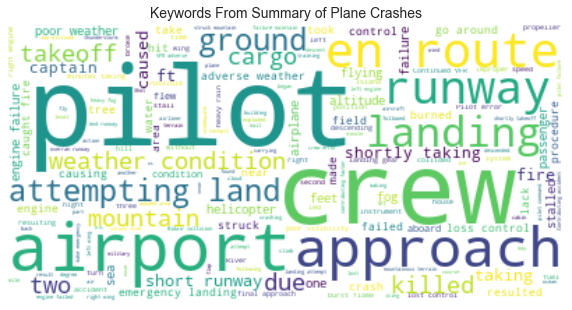

In [20]:
#to show the most common word in the summary

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

text_data = str(crashes.summary.tolist())

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('during')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('due to')

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wc.generate(text_data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Keywords From Summary of Plane Crashes', loc='Center', fontsize=14)
plt.show()

* Several keywords from the summary are 'pilot', 'crew', 'airport', 'approach', 'landing', 'en route', 'runway', 'mountain', 'weather condition', 'attempting land' etc.
* On the other hand, we can also explore and deploy topic modelling with nltk and gensim to analyze the trend of crashes from the summary.

**8. Stories or Insights from the data**

In [21]:
#to find highest number of crashes by flight route
crashes['route'].value_counts()

?                                     1494
Training                                95
Sightseeing                             42
Test flight                             20
Sao Paulo - Rio de Janeiro               7
                                      ... 
Taipei - Macau                           1
Greensville, NC - Philadelphia, PA       1
Kazan - Chelyabinsk - Alma-Ata           1
Trivandrum - Madurai                     1
VP-BPS                                   1
Name: route, Length: 3875, dtype: int64

* This shows that training flight route has the highest number of crashes.
* However, since the routes includes intercity and international flight path, we could further explore the trend of crashes by classifying the type of route as 'Intercity and international flight path', 'Training', Sightseeing' and so on.
* Next, I explore the departure and arrival cities with the most crashes.

In [22]:
#split the route into departure and arrival cities
routes = crashes['route'].str.split('-')
#take routes with 2 cities only
routes = routes[routes.str.len()==2]
crashes['departure'] = routes.str.get(0)  
crashes['arrival'] = routes.str.get(1)  

crashes.head(40)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,...,fatalities_pas,aboard_pas,fatalities_crew,aboard_crew,aboard_num,survival_rate,dead_or_alive,clean_ground,departure,arrival
0,1908-09-17,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),...,1.0,1.0,0.0,1.0,2.0,50.000000,alive,0.0,NaN,NaN
1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),...,0.0,0.0,0.0,1.0,1.0,0.000000,dead,0.0,NaN,NaN
2,1912-07-12,06:30,"Atlantic City, New Jersey",MILITARY - U.S. NAVY,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),...,0.0,0.0,5.0,5.0,5.0,0.000000,dead,0.0,NaN,NaN
3,1913-08-06,?,"Victoria, British Columbia, Canada",PRIVATE,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),...,0.0,0.0,1.0,1.0,1.0,0.000000,dead,0.0,NaN,NaN
4,1913-09-09,c 18:30,Over the North Sea,MILITARY - GERMAN NAVY,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,20.0,30.000000,dead,0.0,NaN,NaN
5,1913-10-17,c 10:30,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,?,?,Zeppelin L-2 (airship),?,?,30 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,30.0,0.000000,dead,0.0,NaN,NaN
6,1915-03-05,c 01:00,"Tienen, Belgium",MILITARY - GERMAN NAVY,?,?,Zeppelin L-8 (airship),?,?,41 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,41.0,48.780488,dead,0.0,NaN,NaN
7,1915-09-03,c 15:20,"Off Cuxhaven, Germany",MILITARY - GERMAN NAVY,?,?,Zeppelin L-10 (airship),?,?,19 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,19.0,0.000000,dead,0.0,NaN,NaN
8,1916-07-28,?,"Near Jambol, Bulgeria",MILITARY - GERMAN ARMY,?,?,Schutte-Lanz S-L-10 (airship),?,?,20 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,20.0,0.000000,dead,0.0,NaN,NaN
9,1916-09-24,c 01:00,"Billericay, England",MILITARY - GERMAN NAVY,?,?,Zeppelin L-32 (airship),?,?,22 (passengers:? crew:?),...,NaN,NaN,NaN,NaN,22.0,0.000000,dead,0.0,NaN,NaN


In [23]:
#to get the departure city with the highest number of crashes
crashes['departure'].value_counts()


Moscow            37
New York City     35
Paris             33
London            31
Rome              29
                  ..
Sampit             1
Dar es Salaam      1
Hickham AFB        1
Bangor, ME         1
Waurika, OK        1
Name: departure, Length: 2024, dtype: int64

In [24]:
#to find the departure city with most fatalities
fatal_by_dep = crashes.groupby('departure')[['fatalities_num']].sum()
fatal_by_dep = fatal_by_dep.rename(columns={"Departure City": "fatalities_num"})
fatal_by_dep = fatal_by_dep.sort_values(by='fatalities_num', ascending=False)
#inspect data
fatal_by_dep.head(10)

,fatalities_num
departure,
Moscow,1980.0
New York City,1968.0
Paris,1385.0
London,1110.0
Jeddah,1010.0
Bangkok,924.0
Taipei,835.0
Rome,800.0
Tokyo,765.0


* Moscow is the departure city with the highest number of fatalities.

In [25]:
crashes['arrival'].value_counts() 


 Paris            35
 Moscow           27
 London           26
 New York City    22
 Los Angeles      21
                  ..
 Dubendorf         1
 Oreway            1
 Anniston, AR      1
 Teteboro, NJ      1
 Nanking           1
Name: arrival, Length: 2205, dtype: int64

In [26]:
#to find the arrival city with most fatalities
fatal_by_arr = crashes.groupby('arrival')[['fatalities_num']].sum()
fatal_by_arr = fatal_by_arr.rename(columns={"Arrival City": "fatalities_num"})
fatal_by_arr = fatal_by_arr.sort_values(by='fatalities_num', ascending=False)
#inspect data
fatal_by_arr.head(10)

,fatalities_num
arrival,
New York City,1414.0
London,1212.0
Moscow,1149.0
Paris,1104.0
Lagos,807.0
Cairo,752.0
Dubai,697.0
Hong Kong,668.0
Tokyo,578.0


* Interestingly, the arrival city with the highest number of crashes is Paris but the arrival city with highest number of fatalities is New York City.
* This shows that higher number of crashes might not imply higher number of fatalities.
* Next, we look into the aircraft type and its relationship with the number of fatalities.

In [27]:
crashes['ac_type'].value_counts() 


Douglas DC-3                                341
de Havilland Canada DHC-6 Twin Otter 300     86
Douglas C-47A                                74
Douglas C-47                                 67
Douglas DC-4                                 41
                                           ... 
Short  S-23 (flying boat)                     1
Boeing B-737-300 / Swearingen SA-227AC        1
Boeing - EC-135N                              1
Beechcraft B-35                               1
Vickers Viscount 701                          1
Name: ac_type, Length: 2742, dtype: int64

In [28]:
#to find the aircraft type with most fatalities
fatal_by_actype = crashes.groupby('ac_type')[['fatalities_num']].sum()
fatal_by_actype = fatal_by_actype.rename(columns={"Air Craft Type": "fatalities_num"})
fatal_by_actype = fatal_by_actype.sort_values(by='fatalities_num', ascending=False)
#inspect data
fatal_by_actype.head(10)

,fatalities_num
ac_type,
Douglas DC-3,4793.0
Douglas C-47,1101.0
Douglas DC-6B,1054.0
Antonov AN-26,1042.0
Ilyushin IL-18B,1008.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,937.0
de Havilland Canada DHC-6 Twin Otter 300,848.0
Yakovlev YAK-40,828.0


* Douglas DC-3 is the deadliest aircraft type with highest number of crashes and fatalities.
* However, we might want to consider the number of aircrafts of type Douglas DC-3 that are in operation across the years to determine the ratio of crashes and fatalities by this type of aircraft for a more accurate insight.